# **DataSet: Flight Price Prediction **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing data
df=pd.read_excel('/content/Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# ANALYSIS
# Missing Value
# Route            10682 non-null  object
# Total_Stops      10682 non-null  object
# Date_time format conversion
# dtype object

In [ ]:
#describe  the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:


df.shape



(10683, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

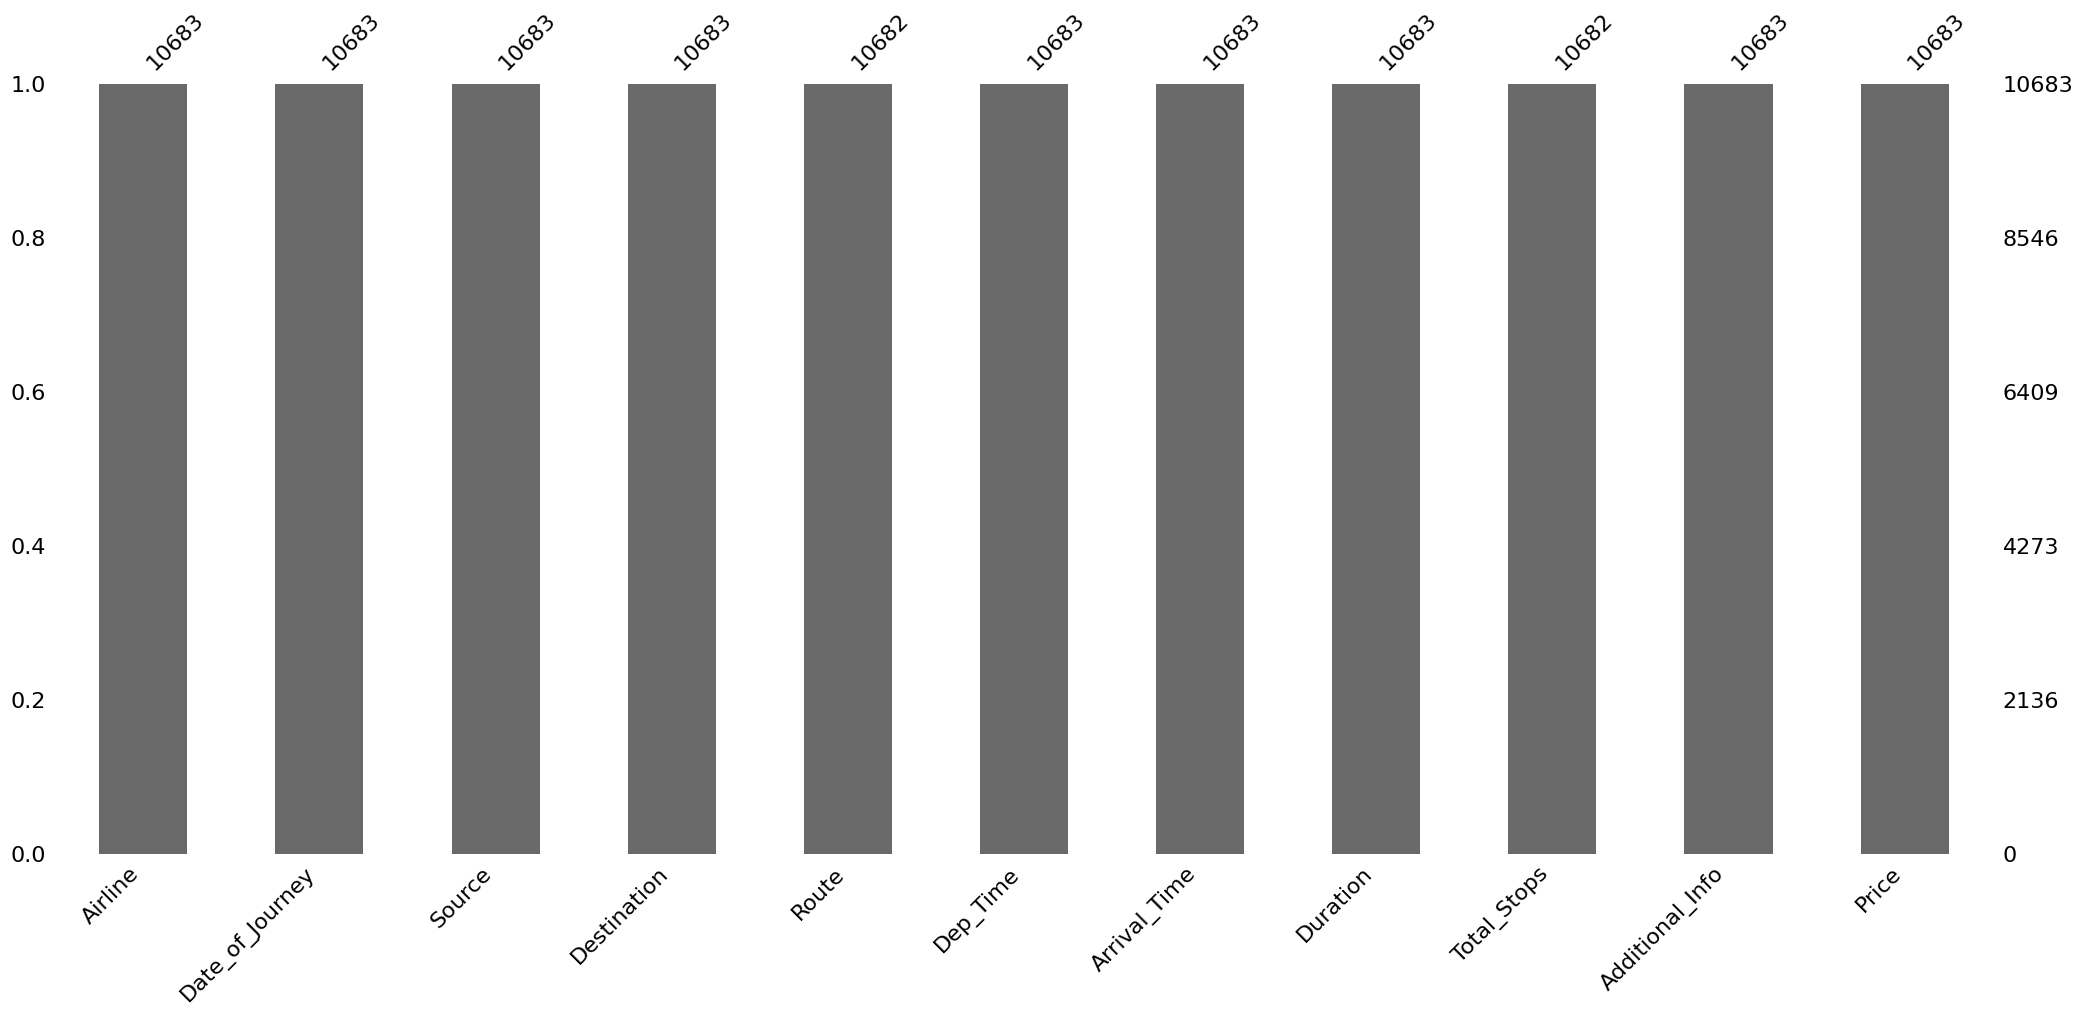

In [ ]:
import missingno as msno
msno.bar(df)
plt.show

In [ ]:
df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:


#drop the nullvalues
df.dropna(inplace=True)



In [ ]:
df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
# Data Cleaning
df.dtypes # datatypes


,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:

# The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.
# dt.day method will extract only day of that date
# dt.month method will extract only month of that date
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
def date_time(col):
  df[col]=pd.to_datetime(df[col])
  # pd.to_datetime(df[col],format='%d/%m/%Y')
  # df[col+'_day']=df[col].dt.day
  # df[col+'_month']=df[col].dt.month
lst=['Date_of_Journey','Dep_Time', 'Arrival_Time']
for i in lst:
  date_time(i)

<ipython-input-78-8327e523b4b3>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col]=pd.to_datetime(df[col])
<ipython-input-78-8327e523b4b3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]=pd.to_datetime(df[col])
<ipython-input-78-8327e523b4b3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]=pd.to_datetime(df[col])


In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-23 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-23 05:50:00,2024-11-23 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-23 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-11-23 18:05:00,2024-11-23 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-11-23 16:50:00,2024-11-23 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2024-11-23 19:55:00,2024-11-23 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-11-23 20:45:00,2024-11-23 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-11-23 08:20:00,2024-11-23 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2024-11-23 11:30:00,2024-11-23 14:10:00,2h 40m,non-stop,No info,12648


In [ ]:
# Now ,we extract day and month from Date_of_journey and stored in 2 other columns.¶
# Then there will be no use of 'Date_of_Journey' column,so we drop it.
df['date_of _journey_day']=df['Date_of_Journey'].dt.day
df['date_of_journey_month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey',axis=1,inplace=True)


In [ ]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_of _journey_day,date_of_journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-11-23 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-23 05:50:00,2024-11-23 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-23 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-11-23 18:05:00,2024-11-23 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-11-23 16:50:00,2024-11-23 21:35:00,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2024-11-23 19:55:00,2024-11-23 22:25:00,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2024-11-23 20:45:00,2024-11-23 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2024-11-23 08:20:00,2024-11-23 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2024-11-23 11:30:00,2024-11-23 14:10:00,2h 40m,non-stop,No info,12648,1,3


In [ ]:
# From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns
def time_hour(col):
  df[col+'_hour']=df[col].dt.hour
def time_min(col):
  df[col+'__min']=df[col].dt.minute
def drop_col(col):
  df.drop(col,axis=1,inplace=True)

lst=['Dep_Time', 'Arrival_Time']
for i in lst:
  time_hour(i)
  time_min(i)
  drop_col(i)

df


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date_of _journey_day,date_of_journey_month,Dep_Time_hour,Dep_Time__min,Arrival_Time_hour,Arrival_Time__min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [ ]:
# Apply pre-processing on duration column,Separate Duration hours and minute from duration
duration=list(df['Duration'])
for i in range(len(duration)):
  if (len(duration[i].split(' '))==2):
    pass
  else:
    if 'h' in duration[i]:
      duration[i]=duration[i]+' 0m'
    else:
      duration[i]='0h '+duration[i]
df['Duration']=duration
df['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [ ]:
# df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
# df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

# df['Duration_hour']
# df['Duration_hour'],df['Duration_min']


In [ ]:
def hour_extract(x):
  return x.split(' ')[0][0:-1]
def min_extract(x):
  return x.split(' ')[1][0:-1]
df['Duration_hour']=df['Duration'].apply(hour_extract)
df['Duration_hour']
df['Duration_min']=df['Duration'].apply(min_extract)
df['Duration_min']

,Duration_min
0,50
1,25
2,0
3,25
4,45
...,...
10678,30
10679,35
10680,0
10681,40


In [ ]:
df.drop('Duration',axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date_of _journey_day,date_of_journey_month,Dep_Time_hour,Dep_Time__min,Arrival_Time_hour,Arrival_Time__min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [ ]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
date_of _journey_day,int32
date_of_journey_month,int32
Dep_Time_hour,int32


In [ ]:
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_min']=df['Duration_min'].astype(int)
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
date_of _journey_day,int32
date_of_journey_month,int32
Dep_Time_hour,int32


In [ ]:
col_cat=[i for i in df.columns if df[i].dtype=='object']
col_cat

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
col_cont=[i for i in df.columns if df[i].dtype!='object']
col_cont

['Price',
 'date_of _journey_day',
 'date_of_journey_month',
 'Dep_Time_hour',
 'Dep_Time__min',
 'Arrival_Time_hour',
 'Arrival_Time__min',
 'Duration_hour',
 'Duration_min']

In [ ]:
# Handling categorical data


# We are using two main Encoding Techniques to covert Categorical data into some numerical format¶
# Nominal data -- Data that are not in any order -->one hot encoding
# ordinal data -- Data are in order --> labelEncoder
categorical_dframe=df[col_cat]
categorical_dframe
cont_dframe=df[col_cont]
cont_dframe

,Price,date_of _journey_day,date_of_journey_month,Dep_Time_hour,Dep_Time__min,Arrival_Time_hour,Arrival_Time__min,Duration_hour,Duration_min
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,1,3,11,30,14,10,2,40


In [ ]:

df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

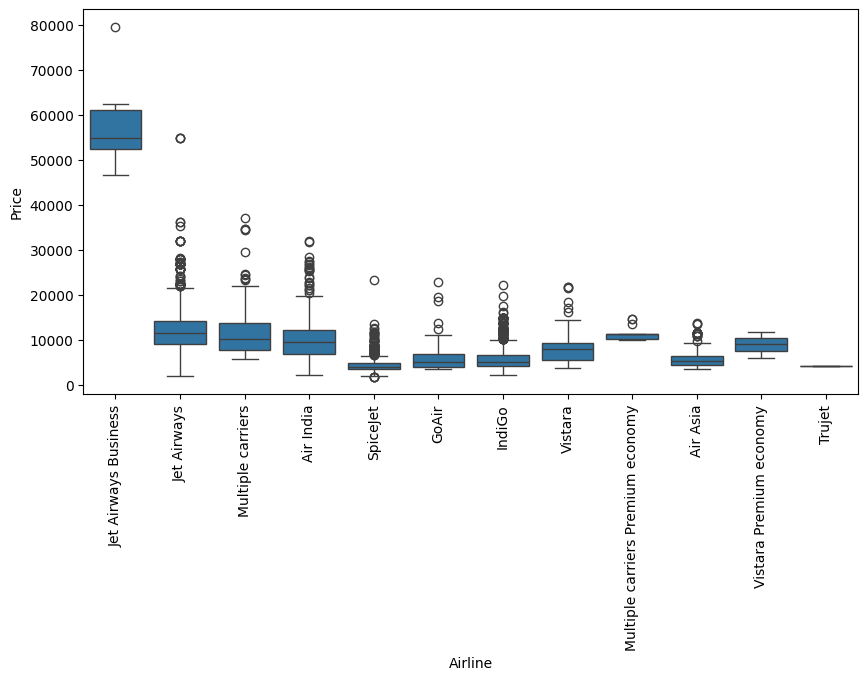

In [ ]:
# Airline vs Price Analysis
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation=90)

In [ ]:
# As Airline is Nominal Categorical data we will perform Get Dummies
df_Airline=pd.get_dummies(categorical_dframe['Airline'],dtype=int,drop_first=True)
df_Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


([0, 1, 2, 3, 4],
 [Text(0, 0, '1 stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, 'non-stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

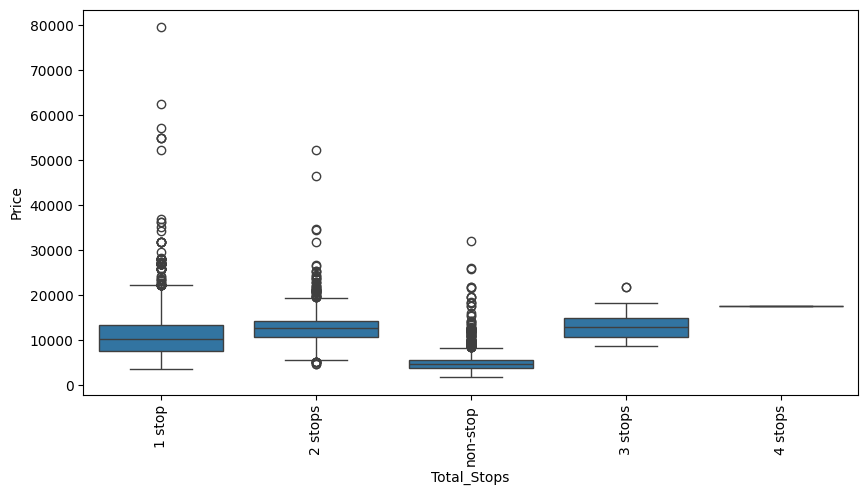

In [ ]:
# Perform Total_Stops vs Price Analysis
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation=90)

In [ ]:

# Overall Inferences:

#     Airline and Total_Stops are both significant factors influencing flight prices.
#     Premium airlines and flights with more stops generally command higher prices.
#     Budget airlines and non-stop flights are typically more affordable.
#     Other factors beyond airline and stops also play a role in determining prices.
# Choose an appropriate Encoding Technique: One-Hot Encoding for nominal categorical features, and
#  potentially Label Encoding for ordinal features like 'Total_Stops',
#  before feeding the data to a machine learning model.





In [ ]:
categorical_dframe['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


<Axes: xlabel='Source', ylabel='Price'>

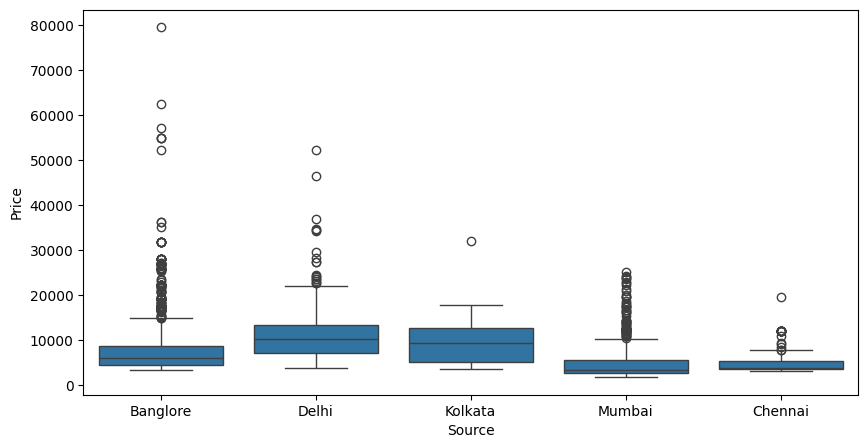

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
df_Source=pd.get_dummies(categorical_dframe['Source'],dtype=int,drop_first=True)
df_Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [ ]:
categorical_dframe['Destination'].value_counts()



,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


<Axes: xlabel='Destination', ylabel='Price'>

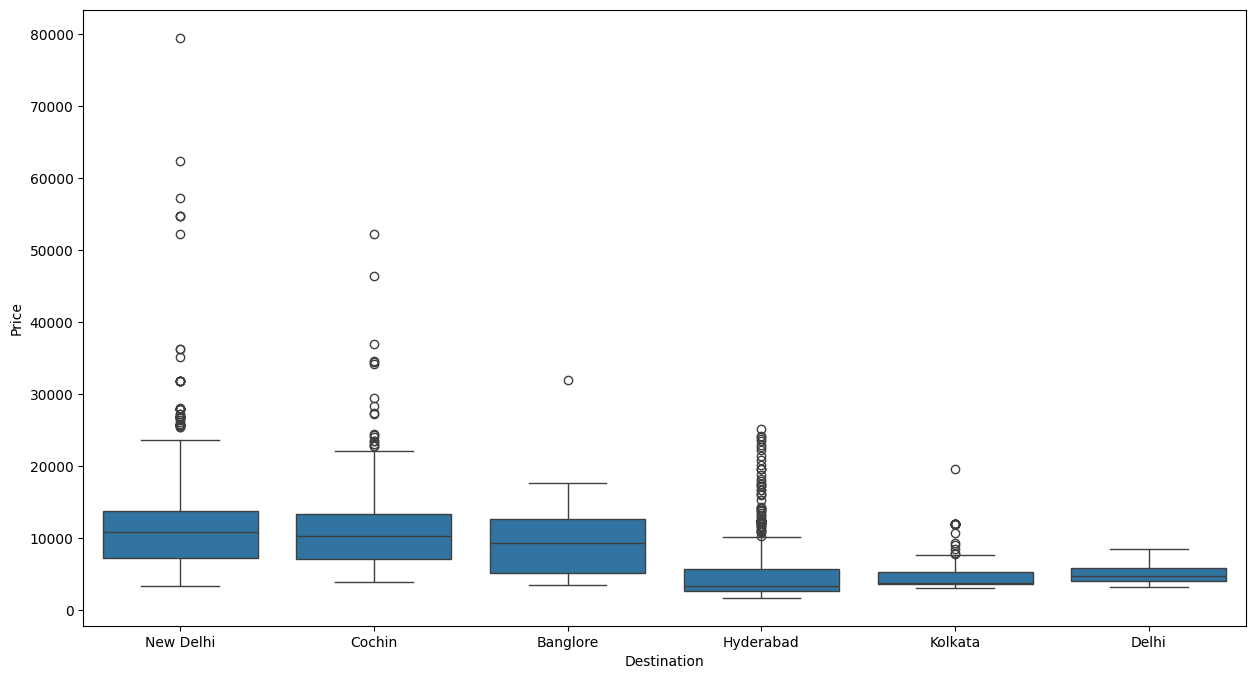

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
df_destination=pd.get_dummies(categorical_dframe['Destination'],dtype=int,drop_first=True)
df_destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [ ]:
categorical_dframe['Route'].value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
CCU → VTZ → BLR,1
CCU → IXZ → MAA → BLR,1
BOM → COK → MAA → HYD,1


In [ ]:
categorical_dframe['Route1']=categorical_dframe['Route'].str.split('→').str[0]
categorical_dframe['Route2']=categorical_dframe['Route'].str.split('→').str[1]
categorical_dframe['Route3']=categorical_dframe['Route'].str.split('→').str[2]
categorical_dframe['Route4']=categorical_dframe['Route'].str.split('→').str[3]
categorical_dframe['Route5']=categorical_dframe['Route'].str.split('→').str[4]

<ipython-input-105-51a51d0659a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe['Route1']=categorical_dframe['Route'].str.split('→').str[0]
<ipython-input-105-51a51d0659a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe['Route2']=categorical_dframe['Route'].str.split('→').str[1]
<ipython-input-105-51a51d0659a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
categorical_dframe

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [ ]:
categorical_dframe.drop('Route',axis=1,inplace=True)
categorical_dframe

<ipython-input-107-4375c75ebf87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe.drop('Route',axis=1,inplace=True)


,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [ ]:
categorical_dframe.isna().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Route1,0
Route2,0
Route3,3491
Route4,9116
Route5,10636


In [ ]:
categorical_dframe['Route3'].fillna('None',inplace=True)
categorical_dframe['Route4'].fillna('None',inplace=True)
categorical_dframe['Route5'].fillna('None',inplace=True)

<ipython-input-109-44b7e31ec452>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_dframe['Route3'].fillna('None',inplace=True)
<ipython-input-109-44b7e31ec452>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe['Route3'].fillna('None',inplace=True)
<ipython-input-109-44b7e31ec452>:2: FutureWarning: A value is tryin

In [ ]:
categorical_dframe.isna().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Route1,0
Route2,0
Route3,0
Route4,0
Route5,0


In [ ]:
for i in categorical_dframe.columns:
    print('{} has total {} categories'.format(i,len(categorical_dframe[i].value_counts())))




Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [ ]:
categorical_dframe['Total_Stops'].value_counts()
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical_dframe['Total_Stops']=categorical_dframe['Total_Stops'].map(dict)

<ipython-input-112-e96b0ff89145>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe['Total_Stops']=categorical_dframe['Total_Stops'].map(dict)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# categorical_dframe['Total_Stops']=le.fit_transform(categorical_dframe['Total_Stops'])
lst=['Route1','Route2','Route3','Route4','Route5']
for i in lst:
  categorical_dframe[i]=le.fit_transform(categorical_dframe[i])



<ipython-input-113-8193f6a0c3e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe[i]=le.fit_transform(categorical_dframe[i])
<ipython-input-113-8193f6a0c3e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe[i]=le.fit_transform(categorical_dframe[i])
<ipython-input-113-8193f6a0c3e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
categorical_dframe

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,0,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,0,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,0,No info,0,13,29,13,5


In [ ]:
categorical_dframe.drop('Additional_Info',axis=1,inplace=True)

<ipython-input-115-8dc67055b944>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe.drop('Additional_Info',axis=1,inplace=True)


In [ ]:
categorical_dframe


,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,5,29,13,5
10679,Air India,Kolkata,Banglore,0,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,0,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,0,0,13,29,13,5


In [ ]:
categorical_dframe.drop(['Airline','Source','Destination'],axis=1,inplace=True)

<ipython-input-117-15211a03df32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dframe.drop(['Airline','Source','Destination'],axis=1,inplace=True)


In [ ]:
categorical_dframe

,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5
...,...,...,...,...,...,...
10678,0,2,5,29,13,5
10679,0,2,5,29,13,5
10680,0,0,13,29,13,5
10681,0,0,13,29,13,5


In [ ]:
df_final=pd.concat([df_Airline,df_Source,df_destination,categorical_dframe,cont_dframe],axis=1)
df_final

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Route5,Price,date_of _journey_day,date_of_journey_month,Dep_Time_hour,Dep_Time__min,Arrival_Time_hour,Arrival_Time__min,Duration_hour,Duration_min
0,0,0,1,0,0,0,0,0,0,0,...,5,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,5,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,5,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,5,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,5,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,5,4107,9,4,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,5,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,5,7229,27,4,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,1,...,5,12648,1,3,11,30,14,10,2,40


In [ ]:
df_final.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Total_Stops', 'Route1', 'Route2', 'Route3', 'Route4',
       'Route5', 'Price', 'date_of _journey_day', 'date_of_journey_month',
       'Dep_Time_hour', 'Dep_Time__min', 'Arrival_Time_hour',
       'Arrival_Time__min', 'Duration_hour', 'Duration_min'],
      dtype='object')

In [ ]:
df_final.dtypes

,0
Air India,int64
GoAir,int64
IndiGo,int64
Jet Airways,int64
Jet Airways Business,int64
Multiple carriers,int64
Multiple carriers Premium economy,int64
SpiceJet,int64
Trujet,int64
Vistara,int64


<Axes: ylabel='Price'>

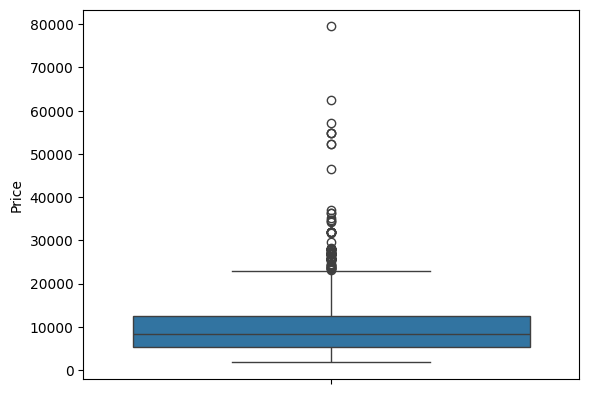

In [ ]:
sns.boxplot(df_final['Price'])

In [ ]:
df_final['Price']=np.where(df_final['Price']>=40000,df_final['Price'].median(),df_final['Price'])

In [ ]:
# Splitting in to X and YAxis
X=df_final.drop('Price',axis=1)
y=df['Price']
X

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Route4,Route5,date_of _journey_day,date_of_journey_month,Dep_Time_hour,Dep_Time__min,Arrival_Time_hour,Arrival_Time__min,Duration_hour,Duration_min
0,0,0,1,0,0,0,0,0,0,0,...,13,5,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,3,5,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,5,5,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,13,5,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,13,5,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,13,5,9,4,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,13,5,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,13,5,27,4,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,1,...,13,5,1,3,11,30,14,10,2,40


In [ ]:
# Feature Selection
# it  is about finding the best feature and having good relation with independent variable
# Issue of dimensionality reduction reduces.

# For this we use mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,y)
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp



,0
Air India,0.654612
GoAir,0.088280
IndiGo,0.632411
Jet Airways,0.883670
Jet Airways Business,0.000000
Multiple carriers,0.510704
Multiple carriers Premium economy,0.014269
SpiceJet,0.316056
Trujet,0.002744
Vistara,0.219381


In [ ]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.993061
Route3,2.541275
Route1,2.310078
Arrival_Time_hour,1.896861
Total_Stops,1.886855
Duration_hour,1.761186
Route4,1.699073
date_of_journey_month,1.666815
Arrival_Time__min,1.594570
Dep_Time_hour,1.520859


In [ ]:
# As we can see from the table, there are several features that have approx 0 value,
# so we should remove it after authorizing it.But for now,we are not removing it.

In [ ]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_percentage_error

def predict(model_alg):
  print(f'model is: {model_alg}')
  model=model_alg
  model.fit(X_train,y_train)
  y_predict=model.predict(X_test)

  print(f'R2score of {model_alg} is {r2_score(y_test,y_predict)} ')
  print(f'MAPE score of {model_alg} is {mean_absolute_percentage_error(y_test,y_predict)}')

In [ ]:
predict(LinearRegression())

model is: LinearRegression()
R2score of LinearRegression() is 0.6229044580327512 
MAPE score of LinearRegression() is 0.2357230998850442


In [ ]:
predict(RandomForestRegressor())

model is: RandomForestRegressor()
R2score of RandomForestRegressor() is 0.8174028814961245 
MAPE score of RandomForestRegressor() is 0.12815776973317805


In [ ]:
# from sklearn.metrics import r2_score,mean_absolute_percentage_error
# r2_score(y_test,y_predict),mean_absolute_percentage_error(y_test,y_predict)
predict(DecisionTreeRegressor())

model is: DecisionTreeRegressor()
R2score of DecisionTreeRegressor() is 0.6461203534080793 
MAPE score of DecisionTreeRegressor() is 0.14674780749130364


In [ ]:
from sklearn.model_selection import GridSearchCV
model1=DecisionTreeRegressor()
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter':['best', 'random']}
grid=GridSearchCV(model1,parameters,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 231, 

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'criterion': 'squared_error', 'splitter': 'best'}

In [ ]:
model_tuned=DecisionTreeRegressor(criterion='squared_error',splitter='best')
model_tuned.fit(X_train,y_train)
y_predict_tuned=model_tuned.predict(X_test)
y_predict_tuned

array([ 4441., 14151., 13994., ...,  3850.,  9663., 10678.])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
r2_score(y_test,y_predict_tuned),mean_absolute_percentage_error(y_test,y_predict_tuned)

(0.6278753767948435, 0.1465993944172558)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],'bootstrap':[True,False],'oob_score':[True,False],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}




rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

{'oob_score': False,
 'n_estimators': 150,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'squared_error',
 'bootstrap': False}

In [ ]:
#predicting the values
prediction=rf_random.predict(X_test)
r2_score(y_test,prediction)

0.8111477647262555

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
predict(GradientBoostingRegressor())

model is: GradientBoostingRegressor()
R2score of GradientBoostingRegressor() is 0.7755552293309356 
MAPE score of GradientBoostingRegressor() is 0.17661438387631984
